In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df = pd.read_csv(r"C:\aiprojects\predictive-maintenance\ai4i2020.csv")
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [116]:
df = df.drop(['UDI','Product ID'], axis=1)
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [117]:
df_cat = df[['Type']]
df_cat

,Type
0,M
1,L
2,L
3,L
4,L
...,...
9995,M
9996,H
9997,M
9998,H


In [118]:
df_num = df.drop(['Type','Machine failure','TWF','HDF','PWF','OSF','RNF'], axis=1)
df_num

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9
...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14
9996,298.9,308.4,1632,31.8,17
9997,299.0,308.6,1645,33.4,22
9998,299.0,308.7,1408,48.5,25


In [119]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [120]:
df_num = scaler.fit_transform(df_num)
df_num

array([[0.30434783, 0.35802469, 0.22293364, 0.53571429, 0.        ],
       [0.31521739, 0.37037037, 0.13969732, 0.58379121, 0.01185771],
       [0.30434783, 0.34567901, 0.19208382, 0.62637363, 0.01976285],
       ...,
       [0.40217391, 0.35802469, 0.27764843, 0.40659341, 0.08695652],
       [0.40217391, 0.37037037, 0.13969732, 0.61401099, 0.09881423],
       [0.40217391, 0.37037037, 0.19324796, 0.5       , 0.11857708]])

In [121]:
df_num = pd.DataFrame(df_num, columns = ['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]'
                                         ,'Torque [Nm]','Tool wear [min]'])
df_num

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0.304348,0.358025,0.222934,0.535714,0.000000
1,0.315217,0.370370,0.139697,0.583791,0.011858
2,0.304348,0.345679,0.192084,0.626374,0.019763
3,0.315217,0.358025,0.154249,0.490385,0.027668
4,0.315217,0.370370,0.139697,0.497253,0.035573
...,...,...,...,...,...
9995,0.380435,0.333333,0.253783,0.353022,0.055336
9996,0.391304,0.333333,0.270081,0.384615,0.067194
9997,0.402174,0.358025,0.277648,0.406593,0.086957
9998,0.402174,0.370370,0.139697,0.614011,0.098814


In [122]:
# Alternate method for converting catagorical data to numerical data
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder()
# cat = encoder.fit_transform(df_cat[['Type']]).toarray()

In [123]:
cat = pd.get_dummies(df_cat[['Type']], dtype=float)
df_cat = pd.DataFrame(cat)

df_cat

,Type_H,Type_L,Type_M
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
9995,0.0,0.0,1.0
9996,1.0,0.0,0.0
9997,0.0,0.0,1.0
9998,1.0,0.0,0.0


In [124]:
X = pd.concat([df_cat,df_num],axis=1)
X

,Type_H,Type_L,Type_M,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0.0,0.0,1.0,0.304348,0.358025,0.222934,0.535714,0.000000
1,0.0,1.0,0.0,0.315217,0.370370,0.139697,0.583791,0.011858
2,0.0,1.0,0.0,0.304348,0.345679,0.192084,0.626374,0.019763
3,0.0,1.0,0.0,0.315217,0.358025,0.154249,0.490385,0.027668
4,0.0,1.0,0.0,0.315217,0.370370,0.139697,0.497253,0.035573
...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.380435,0.333333,0.253783,0.353022,0.055336
9996,1.0,0.0,0.0,0.391304,0.333333,0.270081,0.384615,0.067194
9997,0.0,0.0,1.0,0.402174,0.358025,0.277648,0.406593,0.086957
9998,1.0,0.0,0.0,0.402174,0.370370,0.139697,0.614011,0.098814


In [125]:
y = df[['Machine failure']]
y

,Machine failure
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [127]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 8)
(2000, 8)
(8000, 1)
(2000, 1)


In [128]:
from sklearn.linear_model import SGDClassifier

In [129]:
SGD_model_1 = SGDClassifier()

In [131]:
SGD_model_1.fit(X_train, y_train)

c:\aiprojects\.venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier()

In [132]:
SGD_predictions_1 = SGD_model_1.predict(X_test)

In [422]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score, ConfusionMatrixDisplay
print(confusion_matrix(y_test,SGD_predictions_1))

[[1927    0]
 [  70    3]]


In [135]:
acc = accuracy_score(y_test,SGD_predictions_1)
rec = recall_score(y_test,SGD_predictions_1)
pre = precision_score(y_test,SGD_predictions_1)
f1s = f1_score(y_test,SGD_predictions_1)
print("Accuracy: ", acc)
print("Recall: ", rec)
print("Precision: ", pre)
print("F1 Score: ", f1s)



Accuracy:  0.965
Recall:  0.0410958904109589
Precision:  1.0
F1 Score:  0.07894736842105263


### Grid Search

In [138]:
from sklearn.model_selection import GridSearchCV

In [157]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'max_iter': [1000, 2000, 3000],
    'tol': [0.0001,0.001,0.01,0.1],
    'class_weight': ['balanced'],
    'random_state': [101]
}
# alpha=0.001, penalty='l2', max_iter=1000, tol=1e-3, class_weight='balanced', random_state=101

In [158]:
SGD_grid = GridSearchCV(SGDClassifier(),param_grid,refit=True)

In [159]:
%%capture
SGD_grid.fit(X_train, y_train)

In [160]:
SGD_predictions_2 = SGD_grid.predict(X_test)

In [424]:
cm2 = confusion_matrix(y_test,SGD_predictions_2)
print(cm2)

[[1589  338]
 [  14   59]]


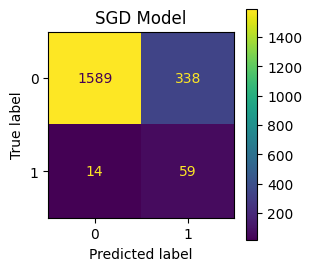

In [425]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=SGD_grid.classes_)
fig, ax = plt.subplots(figsize=(3, 3))
plt.title('SGD Model')#can specify fontsize with fontsize=float
disp.plot(ax=ax)

In [176]:
acc2 = accuracy_score(y_test,SGD_predictions_2)
rec2 = recall_score(y_test,SGD_predictions_2)
pre2 = precision_score(y_test,SGD_predictions_2)
f1s2 = f1_score(y_test,SGD_predictions_2)
print("Accuracy: ", acc2)
print("Recall: ", rec2)
print("Precision: ", pre2)
print("F1 Score: ", f1s2)

Accuracy:  0.824
Recall:  0.8082191780821918
Precision:  0.1486146095717884
F1 Score:  0.251063829787234


In [163]:
SGD_grid.best_params_

{'alpha': 0.001,
 'class_weight': 'balanced',
 'max_iter': 1000,
 'penalty': 'l1',
 'random_state': 101,
 'tol': 0.1}

In [165]:
SGD_grid.best_estimator_

SGDClassifier(alpha=0.001, class_weight='balanced', penalty='l1',
              random_state=101, tol=0.1)

### Undersampling

In [166]:
train_df = pd.concat([X_train,y_train],axis=1)
train_df.head(5)

,Type_H,Type_L,Type_M,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
6861,1.0,0.0,0.0,0.630435,0.691358,0.604773,0.175824,0.169960,0
9881,0.0,1.0,0.0,0.380435,0.506173,0.189173,0.476648,0.521739,0
4536,0.0,1.0,0.0,0.771739,0.555556,0.106519,0.567308,0.664032,1
8430,0.0,1.0,0.0,0.391304,0.555556,0.079162,0.733516,0.723320,0
6765,0.0,1.0,0.0,0.673913,0.641975,0.239814,0.391484,0.043478,0


In [167]:
target1 = train_df[train_df.iloc[:,-1] == 0]
target2 = train_df[train_df.iloc[:,-1] == 1]

In [168]:
target1_count , target2_count = train_df.iloc[:,-1].value_counts()
print(target1_count, target2_count)

7734 266


In [169]:
# Undersampling class 0
target1_u = target1.sample(target2_count)
train_df_u = pd.concat([target1_u, target2], axis=0)

In [170]:
X_train_u = train_df_u.drop(['Machine failure'],axis=1)
y_train_u = train_df_u[['Machine failure']]

In [171]:
SGD_model_3 = SGDClassifier(alpha= 0.001,class_weight= 'balanced', max_iter= 1000, penalty= 'l1', 
                            random_state= 101, tol= 0.1)

In [172]:
SGD_model_3.fit(X_train_u,y_train_u)

c:\aiprojects\.venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.001, class_weight='balanced', penalty='l1',
              random_state=101, tol=0.1)

In [173]:
SGD_predictions_u = SGD_model_3.predict(X_test)

In [174]:
print(confusion_matrix(y_test,SGD_predictions_u))

[[1440  487]
 [  14   59]]


In [175]:
acc3 = accuracy_score(y_test,SGD_predictions_u)
rec3 = recall_score(y_test,SGD_predictions_u)
pre3 = precision_score(y_test,SGD_predictions_u)
f1s3 = f1_score(y_test,SGD_predictions_u)
print("Accuracy: ", acc3)
print("Recall: ", rec3)
print("Precision: ", pre3)
print("F1 Score: ", f1s3)

Accuracy:  0.7495
Recall:  0.8082191780821918
Precision:  0.10805860805860806
F1 Score:  0.19063004846526657


In [178]:
from sklearn.model_selection import RepeatedKFold

In [179]:
%%capture

accuracy_scores = []
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=101)
SGD_model_cv = SGDClassifier(alpha=0.001, max_iter=1000, tol=0.1, penalty="l1",
                             class_weight='balanced', random_state=101)
scores = []
for i in range(5):
    splitted = next(cv.split(X),None)
    X_train_cv = X.iloc[splitted[0]]
    X_test_cv = X.iloc[splitted[1]]
    y_train_cv = y.iloc[splitted[0]]
    y_test_cv = y.iloc[splitted[1]]
    SGD_model_cv.fit(X_train_cv, y_train_cv)
    y_prediction_cv = SGD_model_cv.predict(X_test_cv)
    scores.append(SGD_model_cv.score(X_test_cv,y_test_cv))

In [180]:
conf_cv = confusion_matrix(y_test_cv, y_prediction_cv)
print("Confusion Matrix: \n", conf_cv)

Confusion Matrix: 
 [[1512  415]
 [  13   60]]


In [183]:
acc4 = accuracy_score(y_test,y_prediction_cv)
rec4 = recall_score(y_test,y_prediction_cv)
pre4 = precision_score(y_test,y_prediction_cv)
f1s4 = f1_score(y_test,y_prediction_cv)
print("Accuracy: ", acc4)
print("Recall: ", rec4)
print("Precision: ", pre4)
print("F1 Score: ", f1s4)

Accuracy:  0.744
Recall:  0.2465753424657534
Precision:  0.037894736842105266
F1 Score:  0.06569343065693431


## Oversampling

In [202]:
%%capture

train_df = pd.concat([X_train,y_train],axis=1)
target1 = train_df[train_df.iloc[:,-1] == 0]
target2 = train_df[train_df.iloc[:,-1] == 1]

target1_count , target2_count = train_df.iloc[:,-1].value_counts()

# Oversaampling class 1
target2_o = target2.sample(target1_count, replace=True)
train_df_o = pd.concat([target1, target2_o], axis=0)

In [203]:
train_df_o.shape

(15468, 9)

In [204]:
X_train_o = train_df_o.drop(['Machine failure'],axis=1)
y_train_o = train_df_o[['Machine failure']]

In [205]:
y_train_o.shape

(15468, 1)

In [206]:
SGD_model_5 = SGDClassifier(alpha= 0.001,class_weight= 'balanced', max_iter= 1000, penalty= 'l1', 
                            random_state= 101, tol= 0.1)

In [207]:
SGD_model_5.fit(X_train_o,y_train_o)

c:\aiprojects\.venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.001, class_weight='balanced', penalty='l1',
              random_state=101, tol=0.1)

In [208]:
SGD_predictions_o = SGD_model_5.predict(X_test)

In [210]:
print(confusion_matrix(y_test,SGD_predictions_o))
acc5 = accuracy_score(y_test,SGD_predictions_o)
rec5 = recall_score(y_test,SGD_predictions_o)
pre5 = precision_score(y_test,SGD_predictions_o)
f1s5 = f1_score(y_test,SGD_predictions_o)
print("Accuracy: ", acc5)
print("Recall: ", rec5)
print("Precision: ", pre5)
print("F1 Score: ", f1s5)

[[1650  277]
 [  18   55]]
Accuracy:  0.8525
Recall:  0.7534246575342466
Precision:  0.16566265060240964
F1 Score:  0.271604938271605


## Feature Selection and Dropping The Features

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [272]:
X_train = X_train.drop(['Type_H','Type_L','Type_M', 'Air temperature [K]'], axis=1)
X_test = X_test.drop(['Type_H','Type_L','Type_M', 'Air temperature [K]'], axis=1)
X_train.head(5)

,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
6861,0.691358,0.604773,0.175824,0.169960
9881,0.506173,0.189173,0.476648,0.521739
4536,0.555556,0.106519,0.567308,0.664032
8430,0.555556,0.079162,0.733516,0.723320
6765,0.641975,0.239814,0.391484,0.043478


In [273]:
SGD_model_6 = SGDClassifier(alpha = 0.001, class_weight='balanced', max_iter = 1000,
                            penalty = 'l1', tol = 0.1, random_state = 101)

In [274]:
SGD_model_6.fit(X_train, y_train)

c:\aiprojects\.venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.001, class_weight='balanced', penalty='l1',
              random_state=101, tol=0.1)

In [275]:
SGD_predictions_6 = SGD_model_6.predict(X_test)

In [276]:
print(confusion_matrix(y_test,SGD_predictions_6))

acc6 = accuracy_score(y_test,SGD_predictions_6)
rec6 = recall_score(y_test,SGD_predictions_6)
pre6 = precision_score(y_test,SGD_predictions_6)
f1s6 = f1_score(y_test,SGD_predictions_6)
print("Accuracy: ", acc6)
print("Recall: ", rec6)
print("Precision: ", pre6)
print("F1 Score: ", f1s6)

[[1831   96]
 [  41   32]]
Accuracy:  0.9315
Recall:  0.4383561643835616
Precision:  0.25
F1 Score:  0.31840796019900497


## Dropping Columns + Undersampling

In [414]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [415]:
X_train = X_train.drop(['Type_H','Type_L','Type_M', 'Air temperature [K]'], axis=1)
X_test = X_test.drop(['Type_H','Type_L','Type_M', 'Air temperature [K]'], axis=1)

In [416]:
train_df = pd.concat([X_train,y_train],axis=1)
target1 = train_df[train_df.iloc[:,-1] == 0]
target2 = train_df[train_df.iloc[:,-1] == 1]

target1_count , target2_count = train_df.iloc[:,-1].value_counts()
print(target1_count, target2_count)

7734 266


In [417]:
# Undersampling class 0
target1_u = target1.sample(target2_count)
train_df_u = pd.concat([target1_u, target2], axis=0)

X_train_u = train_df_u.drop(['Machine failure'],axis=1)
y_train_u = train_df_u[['Machine failure']]

In [418]:
SGD_model_3 = SGDClassifier(alpha= 0.01,class_weight= 'balanced', max_iter= 1000, penalty= 'l1', 
                            random_state= 101, tol= 0.0001)

In [419]:
SGD_model_3.fit(X_train_u,y_train_u)

c:\aiprojects\.venv\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.01, class_weight='balanced', penalty='l1',
              random_state=101, tol=0.0001)

In [420]:
SGD_predictions_u = SGD_model_3.predict(X_test)

In [421]:
print(confusion_matrix(y_test,SGD_predictions_u))

acc7 = accuracy_score(y_test,SGD_predictions_u)
rec7 = recall_score(y_test,SGD_predictions_u)
pre7 = precision_score(y_test,SGD_predictions_u)
f1s7 = f1_score(y_test,SGD_predictions_u)
print("Accuracy: ", acc7)
print("Recall: ", rec7)
print("Precision: ", pre7)
print("F1 Score: ", f1s7)

[[1457  470]
 [  21   52]]
Accuracy:  0.7545
Recall:  0.7123287671232876
Precision:  0.09961685823754789
F1 Score:  0.17478991596638654
